In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  # type: ignore
import numpy as np
import numpy.typing as npt

from data.sin import sin_curve, sin_data
from grid.hyperparameters import (ParameterSpace, expand_grid,
                                  full_data_slices, increasing_subslices,
                                  mean_squared_error_metric, plot_metrics,
                                  plot_predictions)
from linear_regression import (GaussianBasisLeastSquaresRegression,
                               PolynomialBasisBayesianLinearRegression,
                               PolynomialBasisLeastSquaresRegression)

In [2]:
s_curve = sin_curve()
s_data = sin_data(n_train=30, n_test=30, noise_stddev=0.3)

In [3]:
parameter_spaces = [
    ParameterSpace(
        model=PolynomialBasisLeastSquaresRegression,
        keyword="regularization_coefficient",
        base_parameters={"m_degrees": 10},
        space=np.linspace(0.0, 100.0, 10),
        base_data=s_data,
        data_slices=full_data_slices(len(s_data.x_train)),
    ),
    ParameterSpace(
        model=PolynomialBasisLeastSquaresRegression,
        keyword="m_degrees",
        base_parameters={},
        space=[i for i in range(10)],
        base_data=s_data,
        data_slices=full_data_slices(len(s_data.x_train)),
    ),
    ParameterSpace(
        model=PolynomialBasisLeastSquaresRegression,
        # TODO fix to allow not providing a keyword (in the case that only the data varies)
        keyword="m_degrees",
        base_parameters={"m_degrees": 4},
        space=[4 for _ in range(10)],
        base_data=s_data,
        data_slices=increasing_subslices(0, len(s_data.x_train), 10),
    ),
]

grid = expand_grid(parameter_spaces)

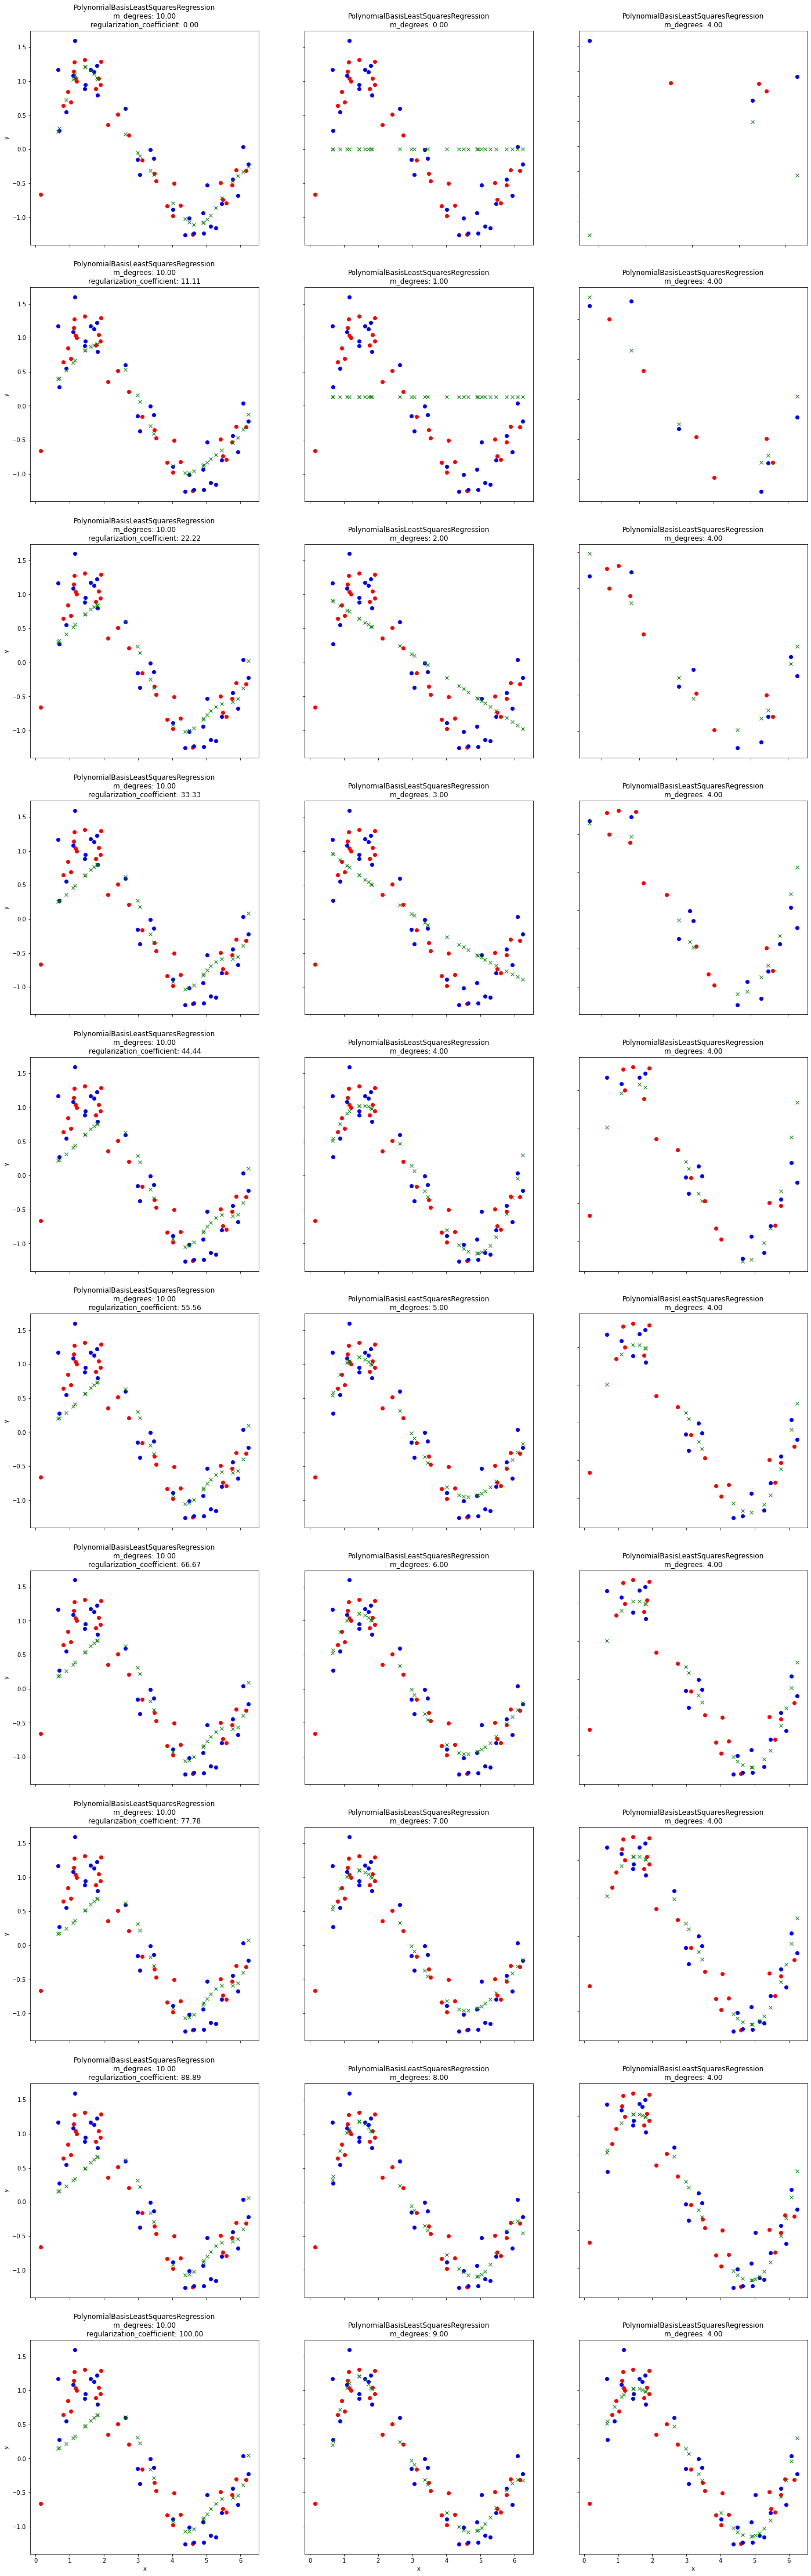

In [4]:
plot_predictions(plt, grid)

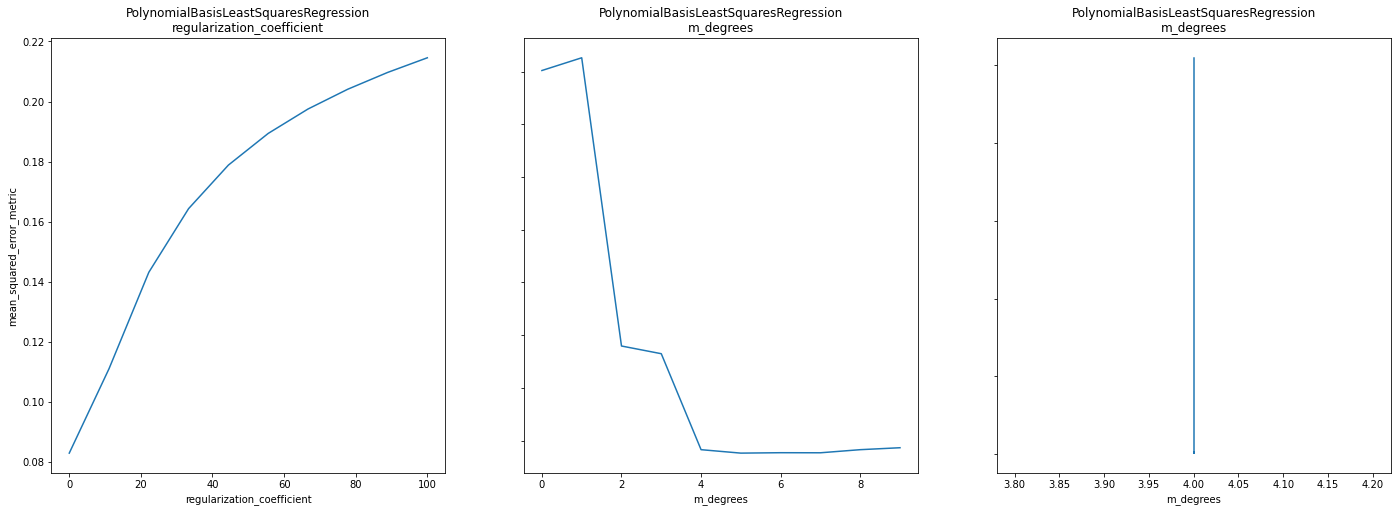

In [5]:
plot_metrics(plt, grid, mean_squared_error_metric)